**ResNet**:

*   Architecture
Building ResNet from scratch [Code](https://www.analyticsvidhya.com/blog/2021/06/build-resnet-from-scratch-with-python/#:~:text=ResNet%20architecture%20uses%20the%20CNN,batchnorm2d%20after%20each%20conv%20layer.&text=Then%20create%20a%20ResNet%20class,and%20the%20number%20of%20classes.)

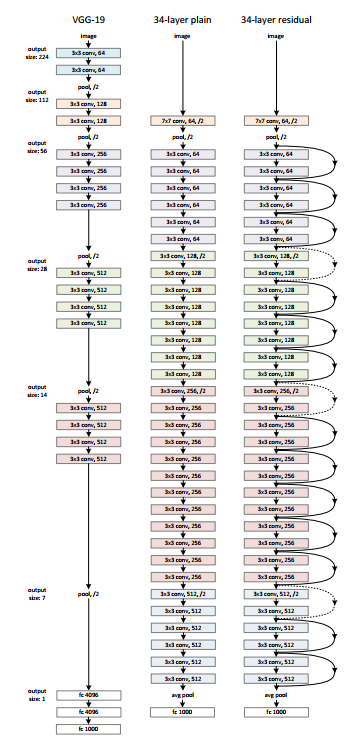


Inception:
MobileNet:
EfficientNet:
YOLO:

Let’s understand the architecture shown above.

The convolutional base is just a feature extractor that learns and extracts the features of any image. It contains the convolution and pooling layers.
The Multi-layer Perceptron is the dense layer that is used as a full connection in a CNN. It gives the output by applying a softmax activation function and getting a list of probabilities for each class.
That means even the pre-trained models that we are going to use have this same structure. So, we can leverage those pre-trained models using the transfer learning paradigm in three ways:

**As pre-trained models:** Modern ConvNets can take more than 2-3 weeks to train across multiple GPUs on your dataset. If your problem lies with the already pre-trained model, then a common approach would be to take that model as it is and predict the labels for the images. This is the most simple way of using transfer learning. However, this would only provide accurate results for which the model had been trained on.

**Fixed feature extractor :** In this approach, you can take a ConvNet, pre-trained on the ImageNet dataset, and remove the last fully connected layer, i.e, the MLP layer in our architecture that we discussed above. You can treat the rest of the ConvNet as a fixed feature extractor for the new dataset. The benefit of this approach would be that even if you have a smaller dataset, this approach would not overfit as you will only train the MLP layer that you added to the convolutional base, i.e., you’ll retrain only the classifier and freeze the conv base. We’ll look at this thing in more detail in the project creation part.

**Fine-tuning:** The last strategy is to not only replace and retrain the classifier on top of the ConvNet on the new dataset but to also fine-tune the weights of the pre-trained network by continuing the back-propagation. It is possible to fine-tune all the layers of the ConvNet; however, it might be s time consuming process. It’s also possible to keep some of the earlier layers fixed (due to overfitting concerns) and only fine-tune some higher-level portion of the network. We’ll look at this in more detail in the project creation section.

There might be a variety of questions in your mind such as:

When do you fine-tune?
How do you fine-tune?
How do you decide what type of transfer learning you should perform on a new dataset?
The answer to the above questions depends on two factors: the size of the new dataset and its similarity to the original dataset on which your pre-trained model was trained. We have listed four common rules that you should keep in mind while performing transfer learning strategies. These are:

New dataset is large and very different from the original dataset: since the dataset is large, we can go ahead and train the ConvNet from scratch, but it would take some time to train a complex network. So, it is common to use a fine-tune approach in this case. It might be the case that fine-tuning the ConvNet may not produce good results. This is due to the fact that the new dataset is very different from the original one. In that case, you can train ConvNet from scratch.
New dataset is large and similar to the original dataset: again, if the dataset is large then we can use the fine-tune approach to save time in training the network from scratch. The model would give good results, as the new dataset is very similar to the original one.
New dataset is small and similar to the original dataset: as the dataset is small, the fine-tuning may lead to overfitting of the model. So, it is advisable to use ConvNet as a fixed feature detector, and add your own classifier (the dense layers) on top of it, and train only that classifier.
New dataset is small but very different from the original dataset: since the dataset is small, you can use the strategy mentioned above. But if the dataset is very different from the original one, then it is advisable to fine-tune the ConvNet. Make sure not to go too deep in the network and try only to adjust the weights of a small number of layers.

In [ ]:
!pip install tensorflow
!pip install keras
import tensorflow
import keras
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
print('Imported Successfully!')

Imported Successfully!


In [ ]:
model = ResNet50(weights='imagenet')
print('Model Downloaded Successfully!')
img_path = '/content/drive/MyDrive/Tutorials/Homework/CNN/lion.jpg'
img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
print('Image Processing Done!')

Model Downloaded Successfully!
Image Processing Done!


Using VGG16 and same technique

In [ ]:
pred = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
print(decode_predictions(pred,top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
[('n02129165', 'lion', 0.9966035), ('n02112137', 'chow', 0.0005661245), ('n02487347', 'macaque', 0.00031218154)]


**VGG-16 architecture**
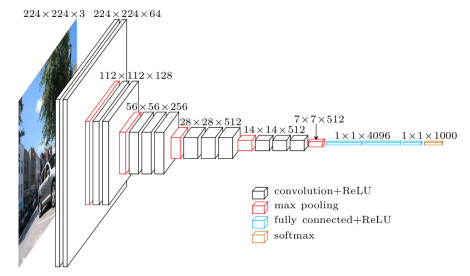

In [ ]:
import keras.applications.vgg16
from keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
from keras.preprocessing import image
import numpy as np
print('Imported Successfully!')
model = VGG16(weights='imagenet')
print('Model Downloaded Successfully!')
img_path = '/content/drive/MyDrive/Tutorials/Homework/CNN/lion.jpg'
img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)
print('Image Processing Done!')
pred = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
print(decode_predictions(pred,top=3)[0])

Imported Successfully!
553476096/553467096 [==============================] - 3s 0us/step
Model Downloaded Successfully!
Image Processing Done!
[('n02129165', 'lion', 0.9689079), ('n02108551', 'Tibetan_mastiff', 0.01856451), ('n02112137', 'chow', 0.008828664)]


1. ResNet is trained on which dataset?
ImageNet
2. What is 50 in ResNet50 stands for?
No of Layers